In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


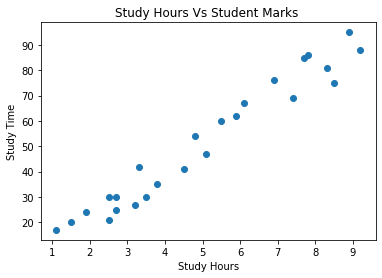

In [ ]:
plt.scatter(x=s_data.Hours,y=s_data.Scores)
plt.xlabel("Study Hours")
plt.ylabel("Study Time")
plt.title("Study Hours Vs Student Marks ")
plt.show()

In [ ]:
# Data Cleaning 
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
s_data.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [ ]:
data2=s_data.fillna(s_data.mean())

In [ ]:
data2.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
data2.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# split dataset for training
x=data2.drop("Scores", axis="columns")
y=data2.drop("Hours",axis="columns")
print("shape of x",x.shape)
print("shape of y", y.shape)

shape of x (25, 1)
shape of y (25, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=51) # tes_size is defining how much data we want for testing so 0.2 means i am using 20 percent data for testing

In [ ]:
print("shape of X Train",X_train.shape)
print("shape of Y Train",Y_train.shape)
print("shape of X Test", X_test.shape)
print("shape of Y Test",Y_test.shape)

shape of X Train (20, 1)
shape of Y Train (20, 1)
shape of X Test (5, 1)
shape of Y Test (5, 1)


# *SELECT A MODEL AND TRAIN IT*

In [ ]:
# So in above scatter plot as we saw that when the value of x is increasing the value of y is also increasing in a linear format so we can use linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_

array([[9.56433743]])

In [ ]:
lr.intercept_

array([2.70197068])

In [ ]:
m= 9.56
c= 2.701
y= m*12+c
y

117.42099999999999

In [ ]:
lr.predict([[4]])[0][0].round(2)

40.96

In [ ]:
y_pred=lr.predict(X_test)
y_pred

array([[55.30582657],
       [76.34736893],
       [68.69589898],
       [82.08597139],
       [28.52568176]])

In [ ]:
pd.DataFrame(np.c_[X_test,Y_test,y_pred], columns=["Hours","Scores_original","Scores_predicted"])

,Hours,Scores_original,Scores_predicted
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


In [ ]:
lr.score(X_test,Y_test) # so our model is giving the accuracy of 92.38%

0.9238518102278781

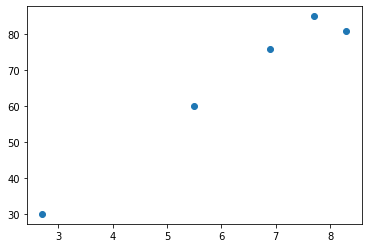

In [ ]:
plt.scatter(X_test,Y_test)

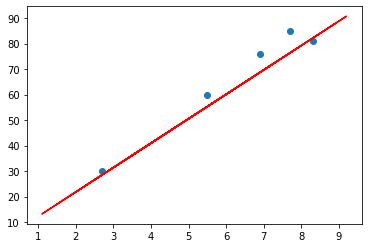

In [ ]:
plt.scatter(X_test,Y_test)
plt.plot(X_train,lr.predict(X_train),color="red")

PREDICT YOUR SOLUTION

In [ ]:
import joblib
joblib.dump(lr,"Student_Marks_Predictor.pkl")

['Student_Marks_Predictor.pkl']

In [ ]:
model=joblib.load("Student_Marks_Predictor.pkl")

In [43]:
model.predict([[9.5]])

array([[93.56317631]])